In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0104/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 439 ms, sys: 17.2 ms, total: 456 ms
Wall time: 458 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.007945,0.0,-0.015862,0.0,-0.018728,0.00000,0.044334,0.000567,0.040543,...,0.00000,-0.011801,0.000000,-0.014348,0.000000e+00,-0.002540,0.0,0.001093,0.0,-0.006951
1,0.0,-0.007200,0.0,-0.014912,0.0,-0.008924,0.00000,0.015186,0.000000,0.036810,...,0.00000,-0.009357,0.000000,-0.013813,0.000000e+00,-0.000842,0.0,0.012773,0.0,-0.006390
2,0.0,-0.007708,0.0,-0.013195,0.0,-0.007611,0.00000,0.005452,0.000000,0.039282,...,0.00000,-0.008539,0.000000,-0.019973,0.000000e+00,-0.001503,0.0,0.010821,0.0,-0.007330
3,0.0,0.002253,0.0,-0.004648,0.0,0.013973,0.04368,0.011136,0.154138,0.033750,...,0.00000,0.000516,0.000000,-0.011991,0.000000e+00,0.006065,0.0,0.021181,0.0,-0.002116
4,0.0,-0.001194,0.0,-0.001524,0.0,0.001779,0.00000,0.007086,0.000000,0.028253,...,0.00194,-0.007728,0.033166,-0.008625,1.767040e-07,0.008750,0.0,-0.001592,0.0,-0.002587


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.00000,0.000567,0.000107,0.0,0.0,0.0,0.0,...,2.140443e-09,0.00003,4.196664e-07,0.000000,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,3.866841e-02,0.072474,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0
3,0.0,0.0,0.0,0.04368,0.154138,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,4.196664e-07,0.00000,0.000000e+00,0.000000,0.0,0.00194,0.033166,1.767040e-07,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.00000,0.000000,0.000567,0.000107,0.0,0.0,0.0,0.0,...,2.140443e-09,0.00003,4.196665e-07,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0
1,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0
2,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,3.942576e-02,0.075165,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0
3,0.0,0.0,0.00000,0.044648,0.166652,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0
4,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,4.196665e-07,0.00000,0.000000e+00,0.000000,0.0,0.001942,0.033722,1.767040e-07,0.0,0.0
5,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0
6,0.0,0.0,0.00002,0.000010,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    33.000000
1    30.000000
2    39.000001
3    40.000000
4    40.998810
5    42.169009
6    30.005317
dtype: float64

In [26]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    # sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 148 ms, sys: 40.4 ms, total: 188 ms
Wall time: 188 ms


In [27]:
len(catch_all_averaged_preds)

910

In [28]:
catch_all_averaged_preds[0]

array([-0.00770578, -0.00712602, -0.00763241,  0.00241768, -0.00110898,
       -0.00099952, -0.00376168], dtype=float32)

In [29]:
# make this a dataframe

In [30]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [31]:
Forecasted_values_df.shape

(7, 910)

In [32]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [33]:
sum_forecasted_values

0    24.606216
1    25.931377
2    27.189676
3    25.643282
4    21.323174
5    30.045502
6    26.488686
dtype: float32

In [34]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [35]:
# concatenate the sum dataframes
block_0104_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0104_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0104_true_and_forecasted_values_df

,True_count,Forecasted_count
0,33.000000,24.606216
1,30.000000,25.931377
2,39.000001,27.189676
3,40.000000,25.643282
4,40.998810,21.323174
5,42.169009,30.045502
6,30.005317,26.488686


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

11.826635922381342

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

10.563603433077665

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.06844959569089806, pvalue=0.8840683930347623)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-4.84379834812449

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 226 ms, sys: 69.6 ms, total: 295 ms
Wall time: 297 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-0.00661151, -0.00112773, -0.00490853, ...,  0.00406925,
         0.00391905, -0.00165634],
       [-0.00659062,  0.00115487, -0.00383097, ...,  0.00330052,
         0.00402173, -0.00184307],
       [-0.00761905,  0.00013229, -0.0031641 , ...,  0.00136048,
         0.00101401, -0.00043254],
       ...,
       [-0.01016542, -0.00468475, -0.00603774, ...,  0.00181261,
         0.00175409, -0.00153257],
       [-0.01124896, -0.00568804, -0.00701721, ...,  0.00096591,
         0.00302581, -0.00218982],
       [-0.01183458, -0.00464612, -0.00559166, ...,  0.0001296 ,
         0.00239785, -0.00263488]], dtype=float32)

In [51]:
# %%time
# # convert less than 0 entries to 0 for all arrays
# for arr in loaded_npy_files:
#     arr[arr < 0] = 0

In [52]:
loaded_npy_files[0]

array([[-0.00661151, -0.00112773, -0.00490853, ...,  0.00406925,
         0.00391905, -0.00165634],
       [-0.00659062,  0.00115487, -0.00383097, ...,  0.00330052,
         0.00402173, -0.00184307],
       [-0.00761905,  0.00013229, -0.0031641 , ...,  0.00136048,
         0.00101401, -0.00043254],
       ...,
       [-0.01016542, -0.00468475, -0.00603774, ...,  0.00181261,
         0.00175409, -0.00153257],
       [-0.01124896, -0.00568804, -0.00701721, ...,  0.00096591,
         0.00302581, -0.00218982],
       [-0.01183458, -0.00464612, -0.00559166, ...,  0.0001296 ,
         0.00239785, -0.00263488]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[36.18953 , 30.728563, 33.783867, ..., 22.471277, 26.182066,
        23.83635 ],
       [31.283367, 28.48529 , 27.85793 , ..., 19.978243, 27.806644,
        32.33134 ],
       [33.78428 , 30.243635, 32.176796, ..., 25.730648, 33.403305,
        24.316282],
       ...,
       [20.827665, 30.90299 , 31.357058, ..., 32.84061 , 38.19602 ,
        40.650677],
       [26.956732, 26.893467, 42.937237, ..., 42.735935, 44.470276,
        37.413082],
       [25.48619 , 31.150606, 43.67241 , ..., 34.774433, 42.63289 ,
        40.470436]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[36.18953 , 30.728563, 33.783867, ..., 22.471277, 26.182066,
        23.83635 ],
       [31.283367, 28.48529 , 27.85793 , ..., 19.978243, 27.806644,
        32.33134 ],
       [33.78428 , 30.243635, 32.176796, ..., 25.730648, 33.403305,
        24.316282],
       ...,
       [20.827665, 30.90299 , 31.357058, ..., 32.84061 , 38.19602 ,
        40.650677],
       [26.956732, 26.893467, 42.937237, ..., 42.735935, 44.470276,
        37.413082],
       [25.48619 , 31.150606, 43.67241 , ..., 34.774433, 42.63289 ,
        40.470436]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[11.86680002],
       [13.7469991 ],
       [12.73177574],
       [ 9.70701838],
       [ 7.0110118 ],
       [15.54573467],
       [12.43489654]])

In [63]:
ui_train

array([[38.72309732],
       [39.24302597],
       [41.20226707],
       [39.6018261 ],
       [36.51533031],
       [45.06730461],
       [41.38826065]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

28.38526797124317

In [66]:
y_traina = block_0104_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[32.99999993],
       [29.99999992],
       [39.00000114],
       [39.9999999 ],
       [40.99881042],
       [42.16900878],
       [30.00531684]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.7142857142857143

In [70]:
np.mean(output, axis = 0)

array([24.60621 , 25.931349, 27.189676, 25.643301, 21.32318 , 30.045511,
       26.48867 ], dtype=float32)

In [71]:
sum_forecasted_values

0    24.606216
1    25.931377
2    27.189676
3    25.643282
4    21.323174
5    30.045502
6    26.488686
dtype: float32

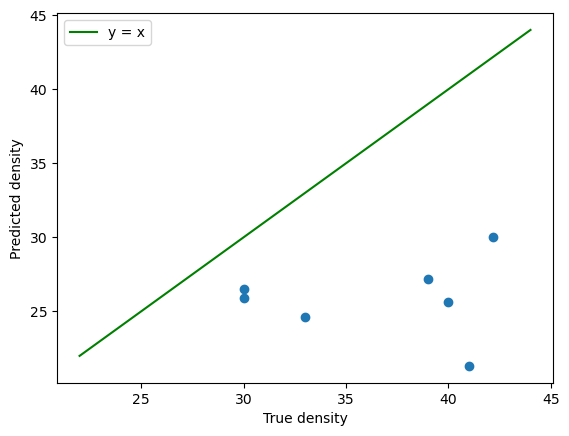

In [72]:
plt.scatter(block_0104_true_and_forecasted_values_df['True_count'], block_0104_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([22, 44], [22, 44], color='green', label='y = x')
plt.legend()
plt.show()

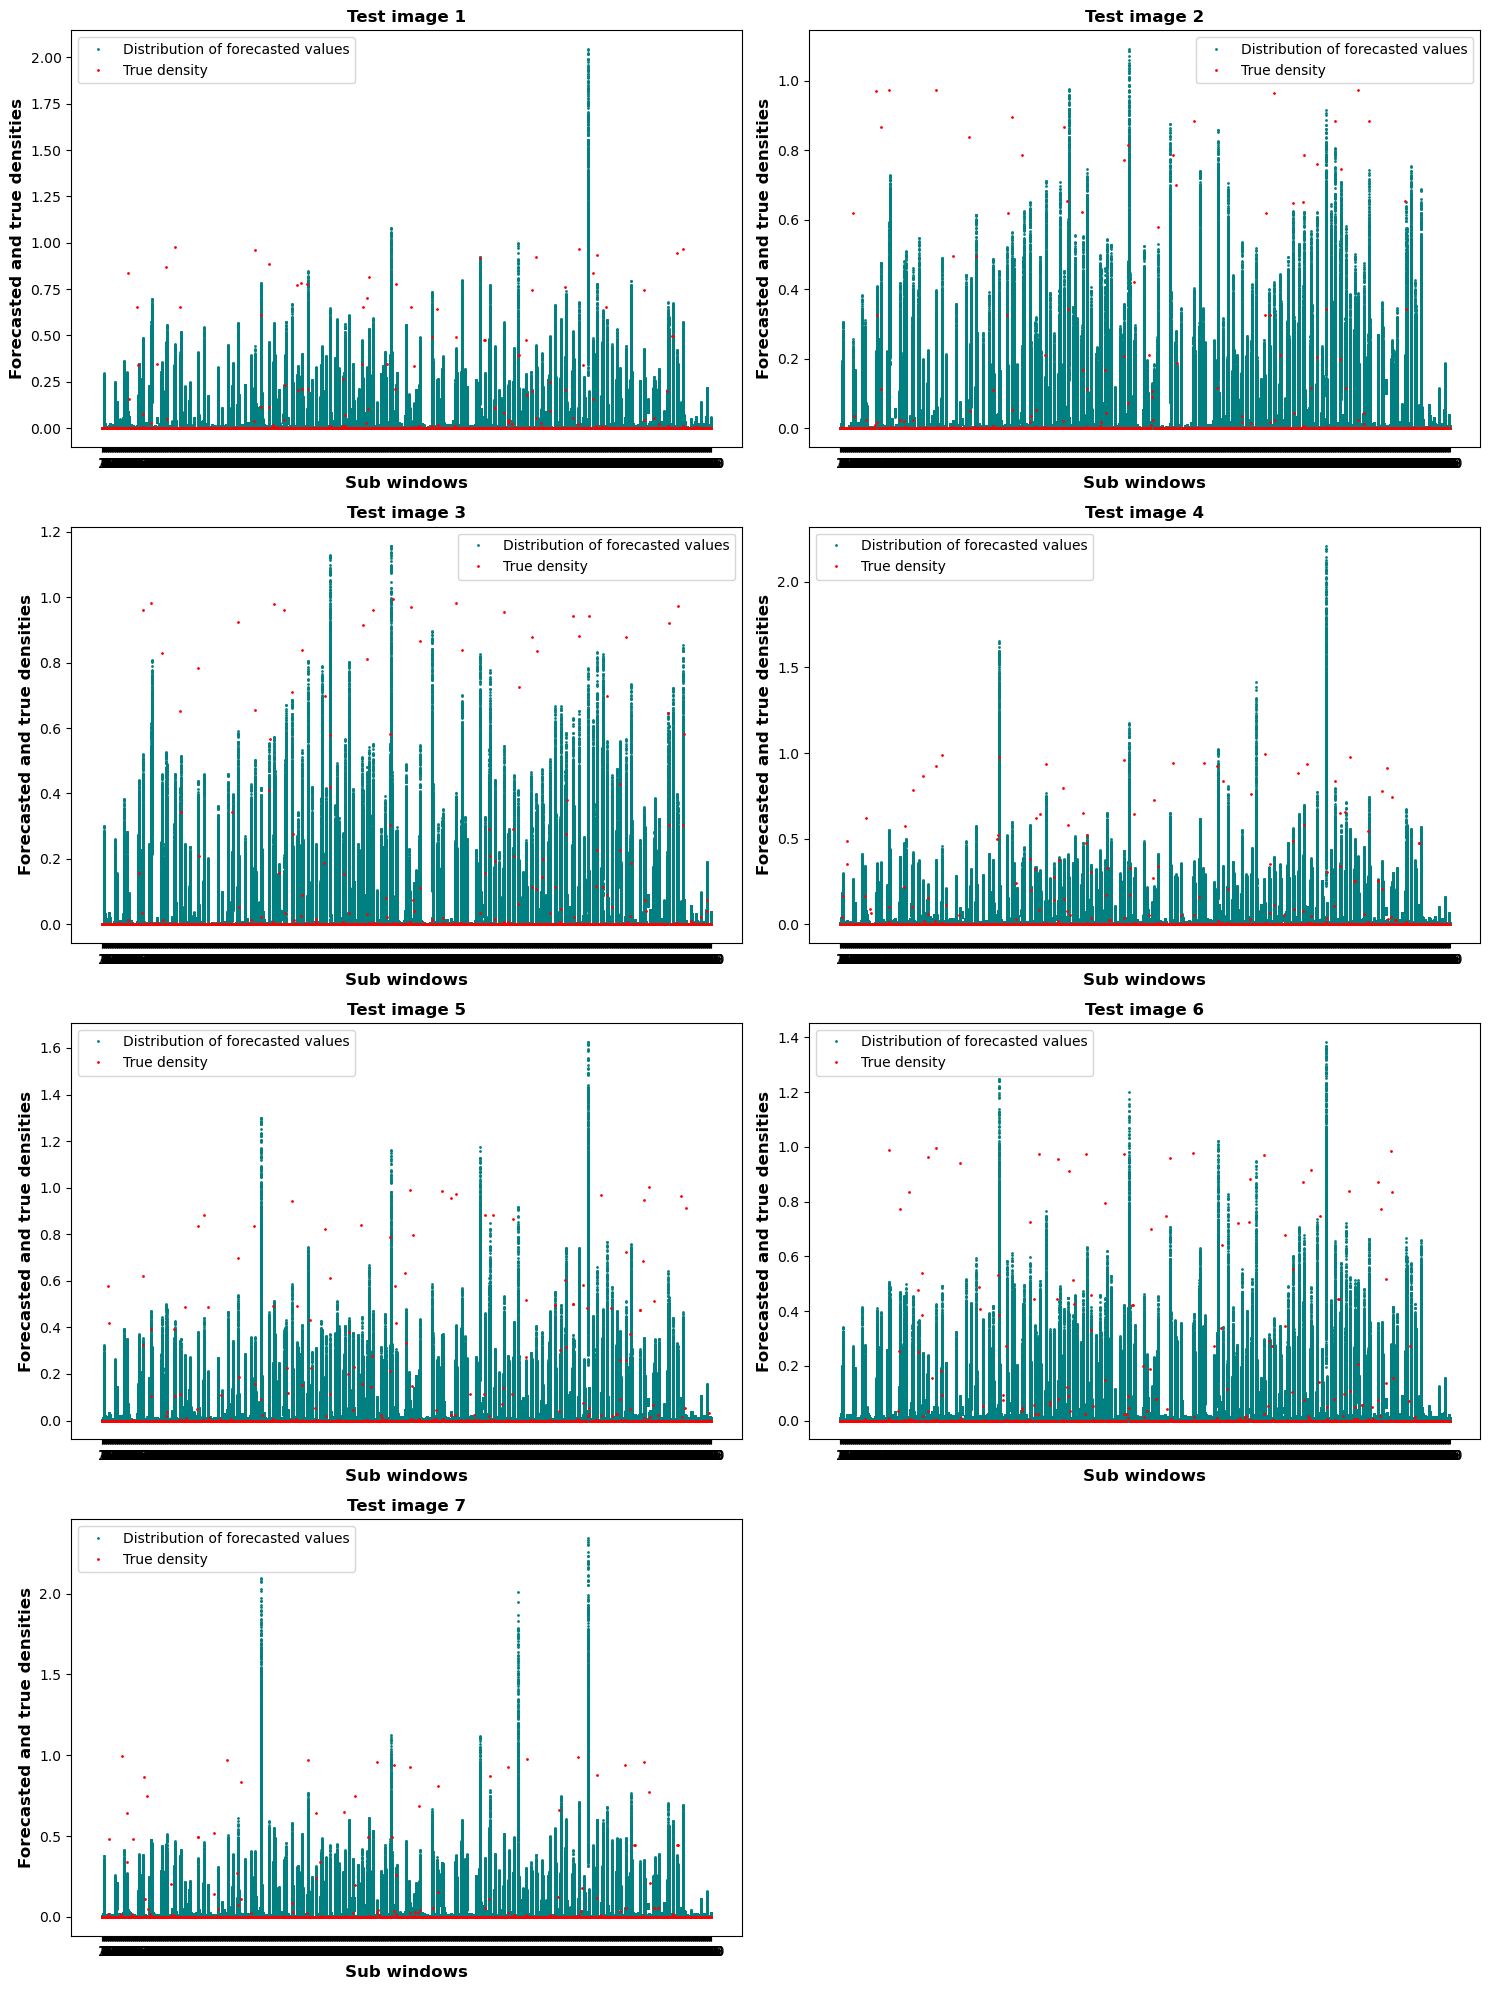

CPU times: user 27 s, sys: 760 ms, total: 27.8 s
Wall time: 27.5 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 